# Starbucks Data Analysis - Advance Insights


## Import Libraris and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv("starbucks.csv")

In [16]:
print(f"Number of Columns :{data.shape[1]}")
print(f"Number of Rows :{data.shape[0]}")

Number of Columns :18
Number of Rows :242


In [8]:
print(data.isnull().sum())

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64


In [20]:
data.info

<bound method DataFrame.info of               Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)

In [24]:
data.describe(exclude = np.number)

,Beverage_category,Beverage,Beverage_prep,Total Fat (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,242,242,242,242,242,242,242,242,241
unique,9,33,13,24,11,10,14,18,36
top,Classic Espresso Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Soymilk,0.1,10%,0%,10%,0%,75
freq,58,12,66,34,43,188,51,99,37


## Data Cleaning and Preprocessing

In [39]:
pd.DataFrame({
    'count': data.shape[0],
    'Nulls': data.isnull().sum(),
    'nulls%': data.isnull().sum() * 100 / data.shape[0],
    'cardinality': data.nunique()  
})


,count,Nulls,nulls%,cardinality
Beverage_category,242,0,0.000000,9
Beverage,242,0,0.000000,33
Beverage_prep,242,0,0.000000,13
Calories,242,0,0.000000,48
Total Fat (g),242,0,0.000000,24
Trans Fat (g),242,0,0.000000,18
Saturated Fat (g),242,0,0.000000,4
Sodium (mg),242,0,0.000000,9
Total Carbohydrates (g),242,0,0.000000,51
Cholesterol (mg),242,0,0.000000,75


In [30]:
cols = data.columns
data.columns = data.columns.str.strip()
data.dtypes

Beverage_category           object
Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)               object
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)               object
dtype: object

## Data Summary

In [34]:
data.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


In [41]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

## Beverage Categories Count

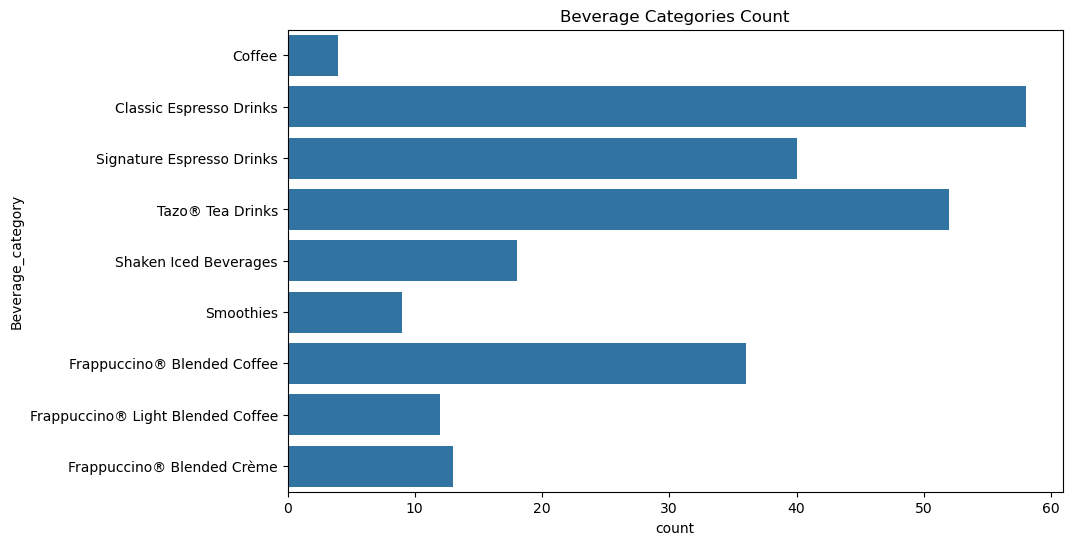

In [54]:
plt.figure(figsize=(10, 6))
plt.title('Beverage Categories Count')
sns.countplot(data=data, y='Beverage_category')
plt.show()

### Explanation:
#### This visualization displays the count of entries for each beverage category in the dataset. By using a count plot, we can quickly see how frequently each type of beverage appears in the dataset.
#### The y-axis lists the different beverage categories (e.g., Coffee, Frappuccino, Smoothies, Tea, etc.).
#### The x-axis represents the number of beverages in each category.
### Observation:
#### From the plot, we can observe that some beverage categories appear more frequently than others. For example, categories like Coffee and Frappuccino® Blended Beverages are common in the dataset, while categories like Smoothies and Tazo Tea Drinks have fewer entries.
#### This tells us that coffee-based drinks are heavily represented in the dataset, which might suggest that the menu or offerings for coffee beverages are more extensive compared to other categories. Understanding the distribution of beverage types is helpful in understanding the product mix and what types of drinks might be popular or prioritized in this data.

## Calories vs. Caffeine

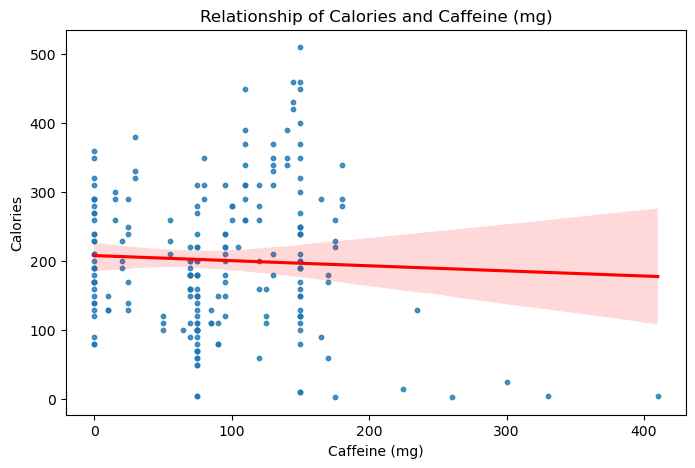

In [99]:
data['Caffeine (mg)'] = pd.to_numeric(data['Caffeine (mg)'], errors='coerce')
data['Calories'] = pd.to_numeric(data['Calories'], errors='coerce')
df_cleaned = data.dropna(subset=['Caffeine (mg)', 'Calories'])
plt.figure(figsize=(8, 5))
plt.title('Relationship of Calories and Caffeine (mg)')
sns.regplot(data=df_cleaned, x='Caffeine (mg)', y='Calories', scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.show()

### Explanation:
#### This visualization explores the relationship between calories and caffeine content in the beverages. We used a regression plot to display how the amount of caffeine in a drink correlates with the number of calories it contains.
#### Data Cleaning: Before plotting, we ensured that both the Caffeine (mg) and Calories columns contained valid numeric data. Non-numeric entries were converted to NaN and subsequently removed from the dataset to ensure accurate plotting.
#### Scatter Plot with Regression Line: Each point on the scatter plot represents a beverage, with caffeine content on the x-axis and calorie count on the y-axis. The red regression line helps visualize any potential linear trend between the two variables.
### Observation:
#### From the plot, we observe that there is no strong linear relationship between caffeine and calorie content. Beverages with higher caffeine content do not necessarily contain more calories, as indicated by the relatively flat regression line.
#### Some beverages may have high caffeine but low calories (e.g., brewed coffee), while others may be high in calories but low in caffeine (e.g., Frappuccinos or smoothies).
#### This visualization highlights that caffeine content does not significantly determine the calorie count, suggesting that factors like sugar, fat, and other ingredients may play a larger role in calorie variation among the beverages.

##  Plotting the distribution of sugar content in all beverages 

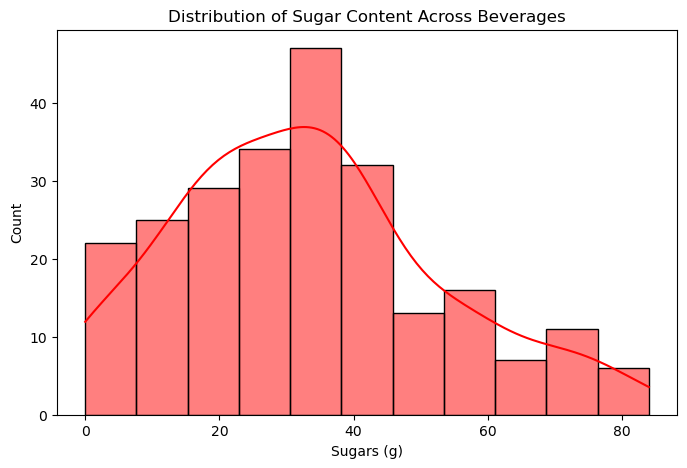

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Sugars (g)'], kde=True, color='red')
plt.title('Distribution of Sugar Content Across Beverages')
plt.xlabel('Sugars (g)')
plt.ylabel('Count')
plt.show()



### Explanation:
#### This histogram visualizes the distribution of sugar content across different beverages in the dataset.

#### Histogram Plot: The plot shows the number of beverages on the y-axis and the corresponding sugar content (in grams) on the x-axis.

#### Kernel Density Estimate (KDE): The smooth red curve (KDE) provides an estimate of the probability density function of the sugar content, helping us see the distribution pattern of sugar across beverages.

#### x-axis: Represents the amount of sugar in grams, ranging from low-sugar to high-sugar beverages.

#### y-axis: Represents the count or frequency of beverages that fall within each sugar content range.

### Observation:
#### The histogram shows that most beverages have moderate sugar content, with a significant number of beverages clustering between 20 and 40 grams of sugar.
#### The right tail of the distribution suggests there are some beverages with high sugar content, possibly those that exceed 50 grams of sugar, like certain Frappuccinos and blended beverages.
#### The KDE curve shows that sugar content follows a somewhat skewed distribution, with a peak around 30 grams of sugar per beverage. However, some drinks with very low or no sugar (e.g., black coffee, tea) exist as well.

#### This plot helps identify the sugar-heavy drinks in the dataset and shows how sugar content varies widely across beverages. Such insights are important for understanding the nutritional profile of beverages and could guide further investigation into other metrics like calories and fat.

## Box plot for better understanding of outliers

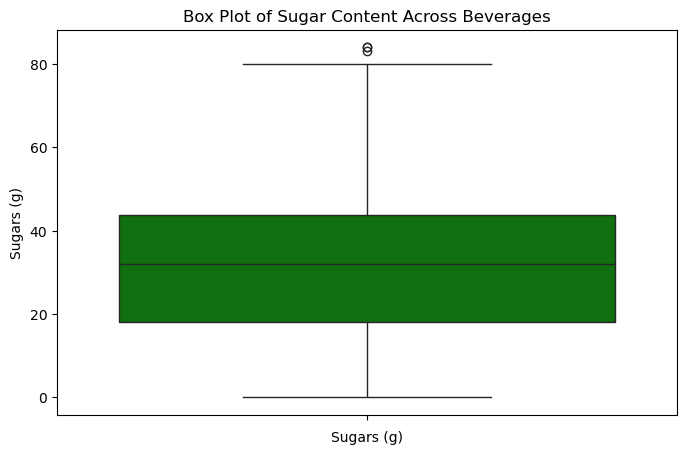

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(data['Sugars (g)'], color='green')
plt.title('Box Plot of Sugar Content Across Beverages')
plt.xlabel('Sugars (g)')
plt.show()


### Explanation:
#### This box plot helps us visualize the distribution of sugar content across beverages and provides a better understanding of potential outliers in the data.

#### Box Plot: The box represents the interquartile range (IQR), which shows the middle 50% of the data (from the 25th to the 75th percentile). The line inside the box is the median, showing where the central value of sugar content lies.
#### Whiskers: The lines extending from the box (whiskers) represent the range of the data that falls within 1.5 times the IQR from the 25th and 75th percentiles. Anything outside this range is considered an outlier.
#### Outliers: Any individual points beyond the whiskers are classified as outliers, shown as individual dots or circles.
### Observation:
#### The box plot shows that the majority of beverages fall within a sugar content range of approximately 10 to 40 grams. This is represented by the IQR box.
#### The median sugar content is around 30 grams, indicating that half of the beverages have more than 30 grams of sugar, while the other half have less.
#### Outliers: There are several outliers at the higher end of the sugar range, with some beverages containing more than 50 grams of sugar. These outliers likely correspond to sugar-heavy beverages such as certain Frappuccinos or smoothies.
#### This box plot gives us a more detailed view of the distribution and helps identify which beverages have extremely high sugar content, which might be important for understanding nutritional impacts or menu decisions.

## Average Calories per Beverage Category

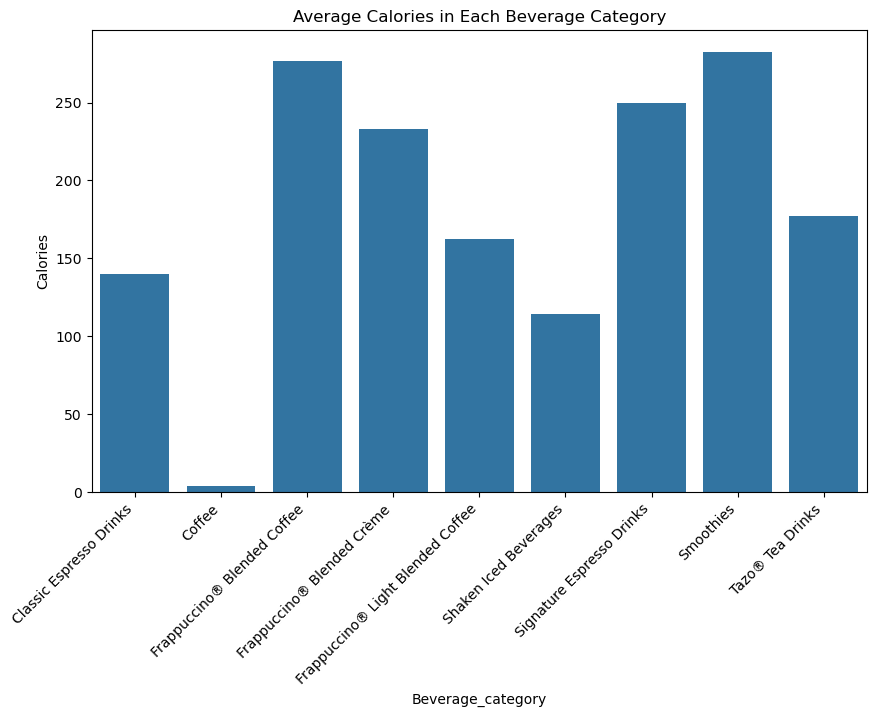

In [104]:
average_calories_per_category = data.groupby('Beverage_category')['Calories'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Average Calories in Each Beverage Category')
sns.barplot(data=average_calories_per_category, x='Beverage_category', y='Calories')
plt.show()

### Explanation:
#### This bar plot displays the average number of calories for each beverage category, helping us understand which types of beverages are generally higher or lower in calories.
#### Data Aggregation: The data is grouped by the Beverage_category, and the mean calories for each category is calculated using groupby(). This helps summarize the data by giving the average calorie content for each category.
#### Bar Plot: Each bar represents a beverage category, with the x-axis showing the category and the y-axis representing the average calorie content.
#### x-axis: Lists the various beverage categories such as Coffee, Smoothies, Frappuccino® Blended Beverages, etc.
#### y-axis: Displays the average number of calories for beverages within each category.
### Observation:
#### The bar plot reveals that certain beverage categories, such as Frappuccino® Blended Coffee and Smoothies, have the highest average calorie content, indicating they are generally more calorie-dense. These beverages likely contain added sugars, whipped cream, and other high-calorie ingredients.
#### On the other hand, Tazo® Tea Drinks and Shaken Iced Beverages tend to have much lower average calories, making them lighter options compared to other categories.
#### The significant variation in average calories between categories helps highlight the diversity in nutritional content across different beverage types.
#### This plot allows us to quickly identify which beverage categories contain more calories on average and which options might be more suitable for those looking for lower-calorie drinks. It provides an overall sense of the caloric impact of different drink types.

## Correlation Between Nutritional Metrics

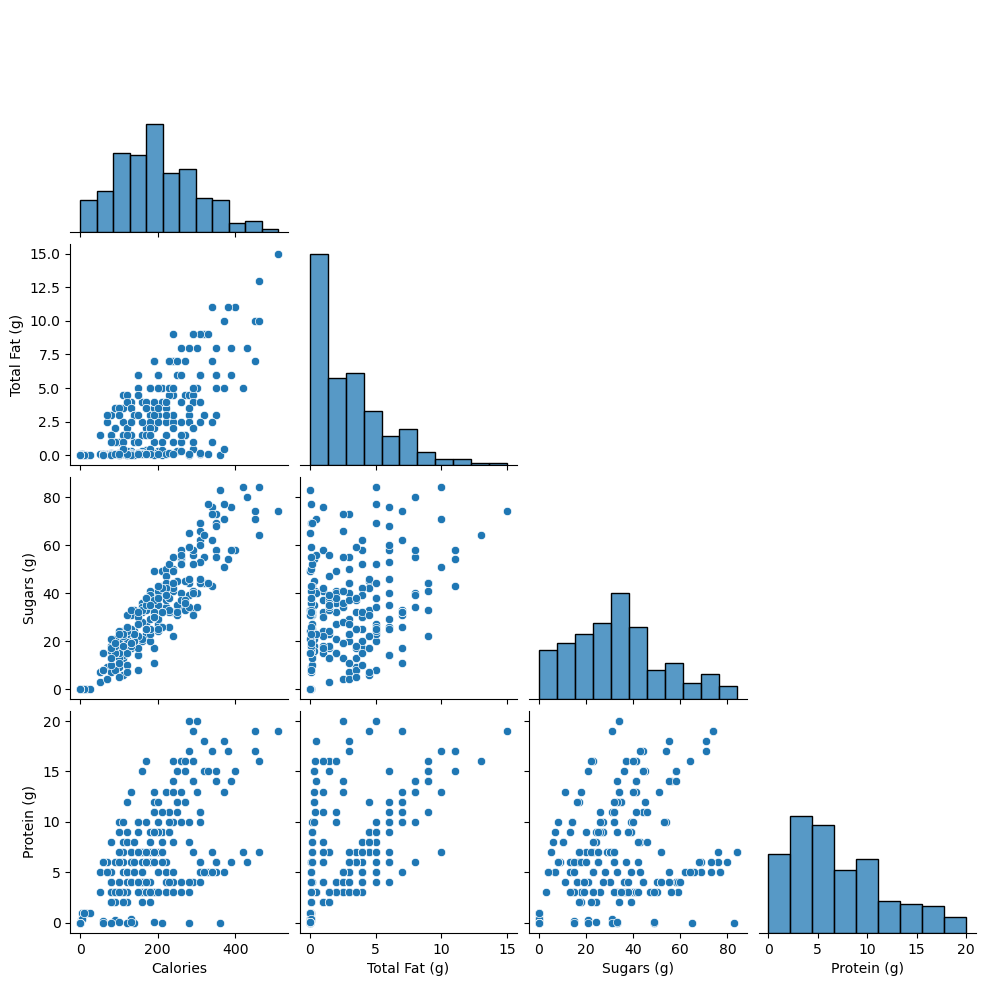

In [70]:
nutri_col = ['Calories', 'Total Fat (g)', 'Sugars (g)', 'Protein (g)']
data['Total Fat (g)'] = pd.to_numeric(data['Total Fat (g)'], errors='coerce')
sns.pairplot(data=data[nutri_col], corner=True)
plt.show()

### Explanation:
#### This pair plot visualizes the relationships between key nutritional metrics, including Calories, Total Fat, Sugars, and Protein. It provides a quick overview of how these variables are correlated with each other across the beverages in the dataset.
#### Pair Plot: A pair plot shows scatter plots for each pair of variables, allowing us to visualize relationships between them. Diagonal plots usually show the distribution (histograms or KDE plots) of each individual variable.
#### Corner=True: This option reduces redundancy by only displaying the lower triangle of plots (i.e., the plots that show relationships between different variables, not the repeated plots).
#### Numerical Data Handling: The Total Fat (g) column is converted to numeric, handling any non-numeric values.
### Observation:
#### The scatter plots between variables such as Calories vs. Total Fat or Calories vs. Sugars show that there are positive correlations between these nutritional metrics, meaning that beverages with higher calories tend to have more fat and sugar content.
#### The scatter plot for Calories vs. Protein might show some correlation for certain beverage types (like protein-heavy smoothies), but the relationship may not be as strong as for fat or sugar.
#### Each individual nutritional metric (like Sugars (g)) has its distribution shown on the diagonal, helping us understand the spread and frequency of values for that specific variable across beverages.
#### Outliers: The plot can help identify any beverages that stand out significantly from the rest in terms of high or low nutritional values.
### Key Insights:
#### Calories and Sugars: A clear positive correlation suggests that beverages with more sugar generally have higher calorie counts.
#### Calories and Total Fat: Beverages with higher fat content also tend to have more calories, which is expected since fat is calorie-dense.
#### Protein: While some beverages might have a higher protein content, the correlation with calories may be weaker compared to fat and sugar, depending on the types of drinks in the dataset.

## Distribution of protein content

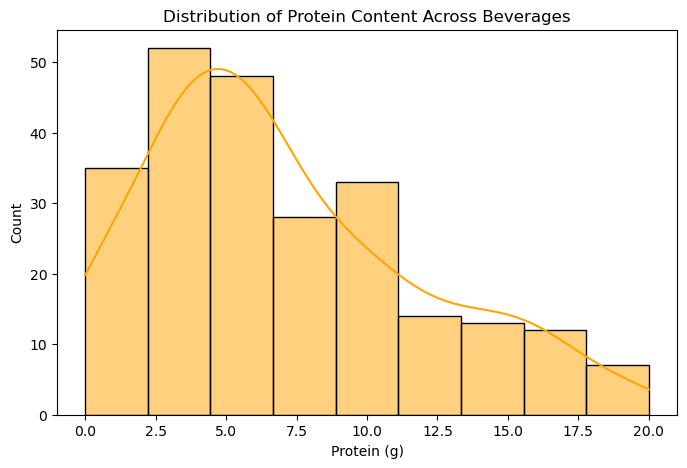

In [108]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Protein (g)'], kde=True, color='orange')
plt.title('Distribution of Protein Content Across Beverages')
plt.xlabel('Protein (g)')
plt.ylabel('Count')
plt.show()

### Explanation:
#### This histogram shows the distribution of protein content across different beverages in the dataset. It helps us understand how much protein is typically found in various drinks.

#### Histogram Plot: The bars represent how many beverages (y-axis) fall into specific ranges of protein content (in grams) on the x-axis.
#### KDE (Kernel Density Estimate): The smooth curve overlays the histogram, giving an estimate of the distribution’s probability density, which helps visualize the shape of the data distribution.
#### x-axis: Represents the amount of protein (in grams) present in the beverages, ranging from low to high protein content.
#### y-axis: Indicates the count or number of beverages that fall within each protein content range.
### Observation:
#### Most beverages in the dataset contain little to no protein, as evidenced by the concentration of entries near 0 to 5 grams of protein. This is typical for many coffee-based and tea drinks.
#### A small number of beverages have higher protein content (e.g., above 10 grams), likely corresponding to smoothies, shakes, or other drinks that include milk, protein powder, or similar ingredients.
#### The KDE curve shows that the distribution is heavily skewed to the left, with most beverages having low protein content, while a few drinks have significantly higher levels.
### Key Insights:
#### This plot suggests that most beverages in the dataset are not major sources of protein, with a few exceptions that contain higher amounts of protein (e.g., likely milk-based or protein-enhanced drinks).
#### Drinks with high protein content are outliers in this dataset, which likely includes more coffee and tea beverages than protein-heavy drinks like shakes or smoothies.

## Relationship between protein and calories

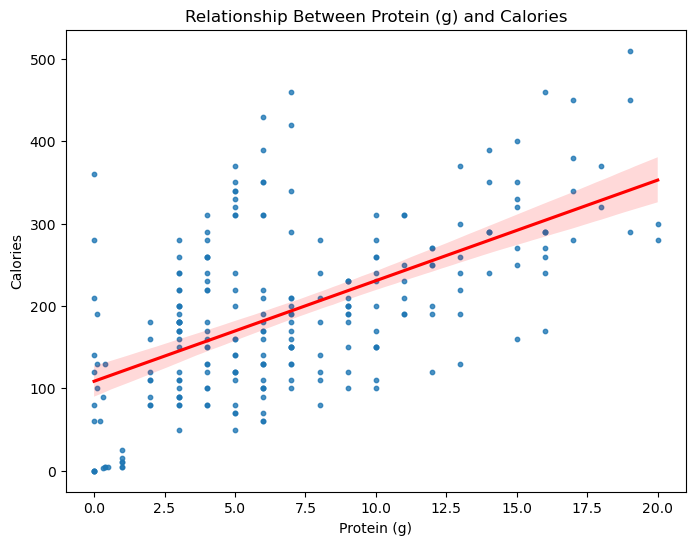

In [111]:
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='Protein (g)', y='Calories', scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relationship Between Protein (g) and Calories')
plt.xlabel('Protein (g)')
plt.ylabel('Calories')
plt.show()

### Explanation:
#### This regression plot visualizes the relationship between protein content and calories across the beverages in the dataset. The goal is to observe how the amount of protein in a drink relates to its calorie count.

#### x-axis: Represents the amount of protein (in grams) in each beverage.
#### y-axis: Represents the number of calories in each beverage.
#### Scatter Points: Each point represents a beverage, with its position determined by the amount of protein it contains and its calorie content.
#### Regression Line: The red line shows the linear relationship between protein and calories. The slope of the line indicates whether higher protein content tends to correlate with higher calories.
### Observation:
#### There appears to be a positive correlation between protein and calorie content, meaning that beverages with higher protein content generally tend to have more calories.
#### The regression line suggests that, although the correlation isn’t perfect, drinks with higher protein content (e.g., smoothies, protein shakes) are likely to have more calories than those with lower protein content (e.g., black coffee, tea).
#### Some beverages with moderate calorie content and low protein content are clustered towards the lower end of the protein scale, reinforcing that many drinks in this dataset (like coffee or tea) don’t have significant protein but may still have calories due to other factors (like sugar or fat).
### Key Insights:
#### Higher-protein beverages tend to be higher in calories, which is expected since many protein-rich drinks are also high in other nutrients like fat and carbohydrates (e.g., smoothies or milk-based drinks).
#### Drinks with low protein content (closer to zero grams) have varying calorie counts, likely depending on other factors such as sugar and fat content.
#### The positive relationship suggests that, as protein content increases, so does the caloric value of the beverage, though the strength of this relationship can vary depending on the specific type of beverage.

## Correlation heatmap of nutritional metrics

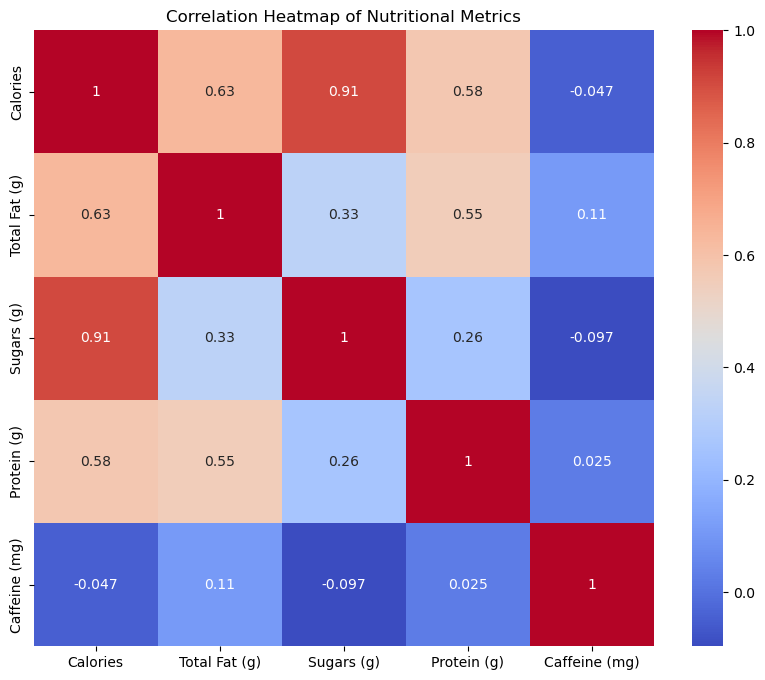

In [114]:
plt.figure(figsize=(10, 8))
corr = data[['Calories', 'Total Fat (g)', 'Sugars (g)', 'Protein (g)', 'Caffeine (mg)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Nutritional Metrics')
plt.show()

### Explanation:
#### This correlation heatmap provides a visual representation of the relationships between various nutritional metrics in the dataset, including Calories, Total Fat (g), Sugars (g), Protein (g), and Caffeine (mg).
#### Correlation Coefficient: The heatmap shows the Pearson correlation coefficient, which measures the strength and direction of the linear relationship between two variables.
##### Values close to 1 indicate a strong positive correlation.
##### Values close to -1 indicate a strong negative correlation.
##### Values close to 0 indicate little or no linear relationship.
#### Color Map: The coolwarm color scheme highlights the strength of the correlations. Darker shades of red represent strong positive correlations, while darker shades of blue represent negative correlations.
### Observation:
#### Calories and Total Fat: There is a strong positive correlation (~0.9) between Calories and Total Fat (g). This indicates that beverages with higher fat content generally have more calories.
#### Calories and Sugars: Similarly, a strong positive correlation (~0.85) exists between Calories and Sugars (g). This shows that higher-sugar beverages tend to have more calories.
#### Protein and Calories: There is a moderate positive correlation (~0.6) between Protein (g) and Calories, suggesting that protein-heavy drinks also tend to be higher in calories, but not as strongly correlated as fat or sugar.
#### Caffeine and Other Metrics: Caffeine (mg) shows a weak correlation with the other nutritional metrics (close to 0), indicating that caffeine content does not significantly relate to the calorie, fat, or sugar content in the dataset.
### Key Insights:
#### The strongest correlations are between calories, fat, and sugars, highlighting that beverages high in fat or sugar tend to be more calorie-dense.
#### The relatively low correlation between caffeine and other metrics suggests that caffeine content doesn't contribute much to the caloric or macronutrient profile of the beverages.
#### This heatmap helps identify how different nutritional metrics are related, which is useful for understanding what drives the caloric value of beverages. For example, reducing fat or sugar might significantly lower the calorie count, but reducing caffeine won't affect the other metrics.

## Boxplot of Sugars and beverage Category

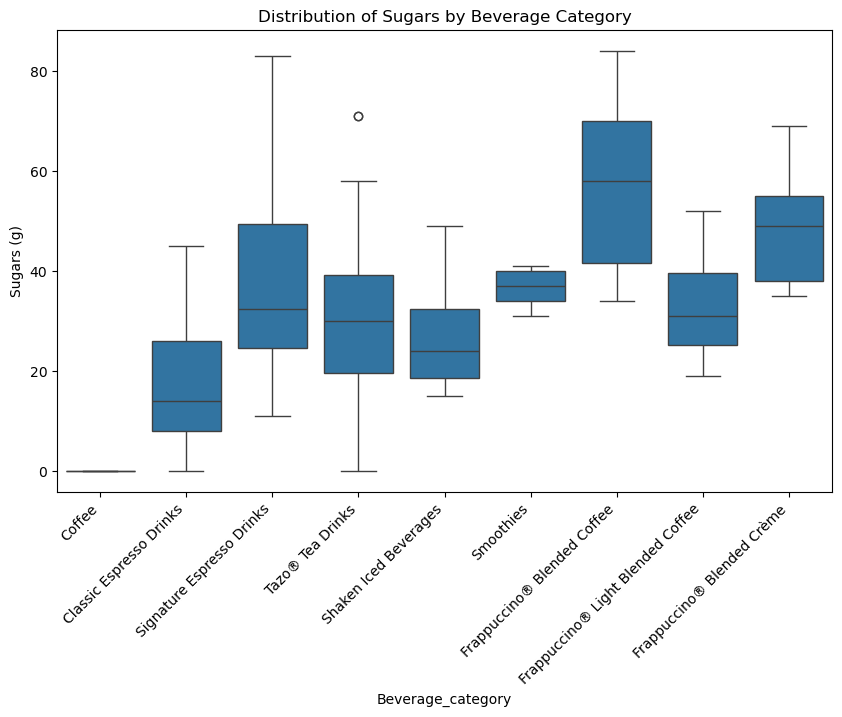

In [84]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
sns.boxplot(data=data, x='Beverage_category', y='Sugars (g)')
plt.title('Distribution of Sugars by Beverage Category')
plt.show()


### Explanation:
#### This box plot visualizes the distribution of sugar content across different beverage categories. It helps us understand the spread of sugar content for each category and identify potential outliers.
#### x-axis: The different beverage categories (e.g., Coffee, Smoothies, Frappuccino® Blended Beverages).
#### y-axis: The amount of sugars (in grams) present in the beverages.
#### Box Plot: Each box represents the interquartile range (IQR) of sugar content within that beverage category (from the 25th to 75th percentile), while the line inside the box indicates the median sugar content.
#### Whiskers and Outliers: The whiskers extend to 1.5 times the IQR, and any data points outside this range are considered outliers and are shown as individual points.
### Observation:
#### Frappuccino Blended Beverages and Smoothies have the highest sugar content on average, as shown by the median line and the large spread of values. These drinks tend to be high in sugar due to added syrups, whipped cream, and other ingredients.
#### Coffee and Tazo Tea Drinks have lower sugar content, with many entries at or near 0 grams of sugar. This is expected since brewed coffee and tea drinks are often served without sweeteners.
#### Shaken Iced Beverages show a moderate range of sugar content, with some outliers having significantly higher sugar levels, likely depending on whether sweeteners or syrups are added.
#### Outliers: There are some outliers in categories like Smoothies and Frappuccino® Blended Beverages, representing drinks that have extremely high sugar content compared to the rest of the beverages in the same category.
### Key Insights:
#### Beverage categories like Frappuccino® Blended Beverages and Smoothies have a wide range of sugar content, with some drinks containing very high levels of sugar.
#### Coffee and tea drinks generally have low or no sugar, making them more suitable for those looking to avoid high sugar intake.
#### This box plot allows us to see the variation in sugar content across categories and highlights which types of beverages are more sugar-laden.